# Contextualização
Robert é um Investidor Anjo e pretende fechar negócio com algumas startups dos Estados Unidos. Ele pretende fazer uma pesquisa entre 50 startups selecionadas e, para isso, irá precisar de uma análise estatística dessas empresas para tomar sua decisão.

Você foi contratado por Robert como Consultor de Ciência de Dados para realizar essa análise entre as 50 startups. Através de seus conhecimentos de estatística, faça o tratamento de dados necessário da base dessas empresas e monte um modelo de regressão que auxilie na tomada de decisão do investidor.

**Dataset**: https://www.kaggle.com/datasets/karthickveerakumar/startup-logistic-regression

# Carregamento de bibliotecas e Funções

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import patsy as pt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge

In [7]:
def desc_null(df):
  des = df.describe(include='all', 
                    datetime_is_numeric=True).T
  des['nullCount'] = df.shape[0] - des['count']
  des['null%'] = (des['nullCount'] / df.shape[0]) * 100
  return des

In [63]:
def histplot(data, title, xlabel, ylabel, x=None, y=None, bins=10):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(10,5))
    
    sns.histplot(data=data, x=x, y=y, bins=bins)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return plt.show()

In [39]:
def corrplot(data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize= (10, 7))

    sns.heatmap(data = data.corr(), 
                cmap = sns.diverging_palette(230, 20, as_cmap=True), 
                vmin = -1, 
                vmax = 1,
                annot = True)

    return plt.show()

# Carregamento dos dados

* **R&D Spend**: Gastos com pesquisa e desenvolvimento pela startup (USD)
    * Range: 0,00 - 165.349,20
* **Administration**: Gastos administrativos pela startup (USD)
    * Range: 51.283,14 - 182.645,56
* **Marketing Spend**: Gastos com marketing pela startup (USD)
    * Range: 0,00 - 471.784,10
* **State**: Estado de origem da startup
    * 3 valores únicos: New York (17), California (17), Florida (16)
* **Profit**: Lucros da statup
    * Range: 14.681,40 - 192.261,83

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/'
                 'AdvancedStatistics-Course/main/data/50_Startups.csv')

In [44]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
desc_null(df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nullCount,null%
R&D Spend,50.0,NaN,NaN,NaN,73721.6156,45902.256482,0.0,39936.37,73051.08,101602.8,165349.2,0.0,0.0
Administration,50.0,NaN,NaN,NaN,121344.6396,28017.802755,51283.14,103730.875,122699.795,144842.18,182645.56,0.0,0.0
Marketing Spend,50.0,NaN,NaN,NaN,211025.0978,122290.310726,0.0,129300.1325,212716.24,299469.085,471784.1,0.0,0.0
State,50,3,New York,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Profit,50.0,NaN,NaN,NaN,112012.6392,40306.180338,14681.4,90138.9025,107978.19,139765.9775,192261.83,0.0,0.0


In [13]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

# Análise Exploratória dos dados

Traga os dados estatísticos descritivos apresentados na base para cada propriedade.

* Plote histogramas para analisar a distribuição em cada uma das propriedades. 
    * Plote gráficos de barras que demonstrem a distribuição dos estados. 
    * Plote também, gráficos de correlação para cada uma das propriedades.
* Crie um gráfico box-plot que traga o lucro das startups por estado.

## Distribuição 
### R&D Spend

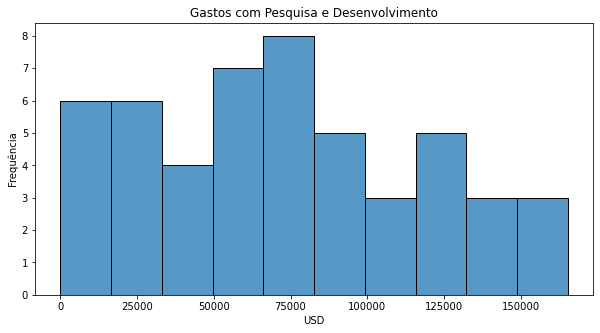

In [64]:
histplot(data=df, 
         x='R&D Spend', 
         title='Gastos com Pesquisa e Desenvolvimento', 
         xlabel='USD',
         ylabel='Frequência')

### Administration

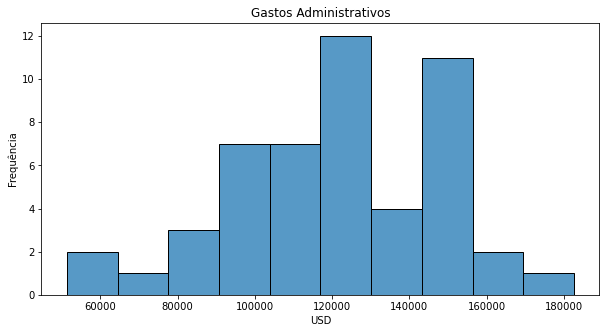

In [65]:
histplot(data=df, 
         x='Administration', 
         title='Gastos Administrativos', 
         xlabel='USD',
         ylabel='Frequência')

### Marketing Spend

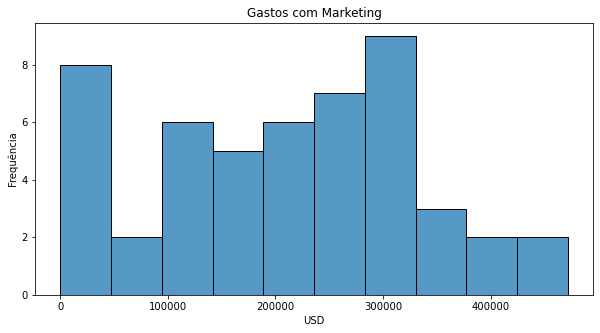

In [66]:
histplot(data=df, 
         x='Marketing Spend', 
         title='Gastos com Marketing', 
         xlabel='USD',
         ylabel='Frequência')

### Profit

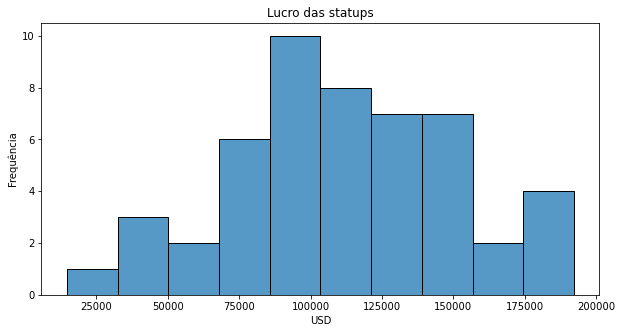

In [67]:
histplot(data=df, 
         x='Profit', 
         title='Lucro das statups', 
         xlabel='USD',
         ylabel='Frequência')

### State

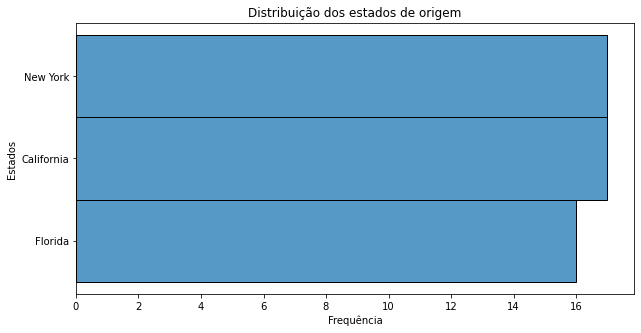

In [68]:
histplot(data=df, 
         y='State', bins=3,
         title='Distribuição dos estados de origem', 
         xlabel='Frequência',
         ylabel='Estados')

## Correlação

Existe uma correlação positiva muito alta entre:
* **R&D Spend** e **Profit** de 0,97
* **Marketing Spend** e **Profit** de 0,75

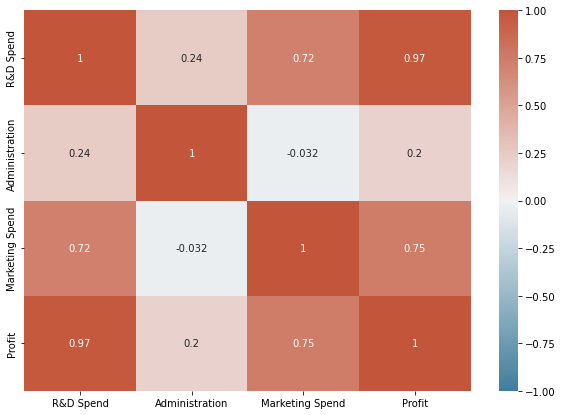

In [40]:
corrplot(df)

## Box-plot

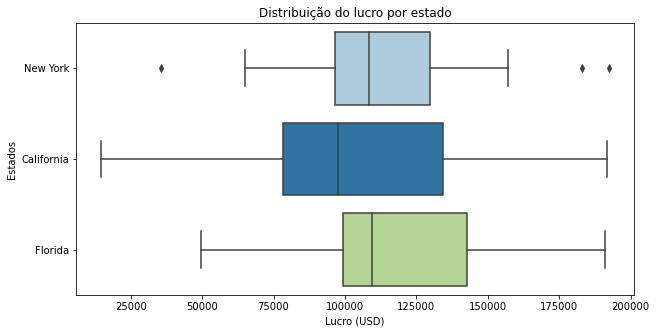

In [31]:
plt.figure(figsize=(10,5))

sns.boxplot(data=df,
            x='Profit',
            y='State',
            palette='Paired')

plt.title('Distribuição do lucro por estado')
plt.xlabel('Lucro (USD)')
plt.ylabel('Estados')
plt.show()

# Pré-Processamento de Dados

* Separar as variáveis em contínuas, categóricas e resposta;
* Realize o pré-tratamento das variáveis;
* Aplique o escalonamento das variáveis contínuas, dummyficação das variáveis categóricas e avalia se a resposta precisa de tratamento

In [54]:
resp = ['Profit']
num = list(df.select_dtypes(include=[np.number]).drop(columns=resp))
cat = list(df.select_dtypes(exclude=[np.number]))

## One-Hot Encoding

In [56]:
dfCat = pd.get_dummies(df[cat],
                       columns=cat, 
                       drop_first=True)
dfCat.head()

,State_Florida,State_New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


## Escalonamento das variáveis contínuas

In [60]:
for n in num:
    normKol = sp.stats.kstest(df[n], cdf='norm')
    print(f'{n} - stats = {normKol.statistic:.3f}, p = {normKol.pvalue:.3f}')

R&D Spend - stats = 0.960, p = 0.000
Administration - stats = 1.000, p = 0.000
Marketing Spend - stats = 0.940, p = 0.000


## Avaliação da variável resposta - **Profit**